**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display

%matplotlib inline 
np.random.seed(42)
pd.set_option('display.max_columns', 80)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [3]:
# 1460 rows, 80 columns
local_csv = '../data/train.csv'
housing_df = pd.read_csv(local_csv)
housing_df.set_index('Id', inplace=True)

In [4]:
display(housing_df.head(10))
display(housing_df.tail())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

In [5]:
assert 1 == 1

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [6]:
housing_df['MSSubClass'] = housing_df['MSSubClass'].astype(object)

In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

### B. Plot histograms of the numeric columns. 

In [8]:
y = housing_df[housing_df['LotFrontage'].notnull()]['LotFrontage']
X = housing_df[housing_df['LotFrontage'].notnull()]['LotArea']

In [9]:
inverse = np.linalg.inv

def find_betas(X,y):
    bias_col = np.ones(X.shape[0])
    X_with_bias = np.c_[bias_col, X]
    xtxinv = inverse(X_with_bias.T.dot(X_with_bias))
    xty = X_with_bias.T.dot(y)
    betas = xtxinv.dot(xty)
    return betas

In [10]:
betas = find_betas(X,y)

In [11]:
def model_from_betas(betas_array):
    return lambda x: betas_array[0] + betas_array[1] * x

In [12]:
my_model = model_from_betas(betas)

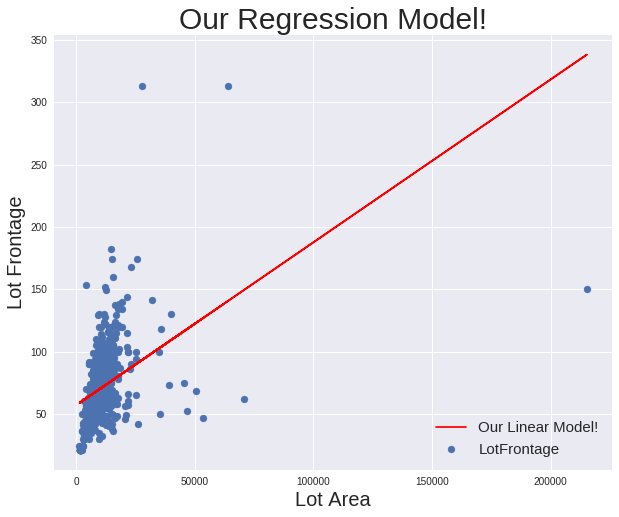

In [13]:
y_pred = np.array([my_model(x) for x in X])

fig = plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.xlabel('Lot Area', fontsize = 20)
plt.ylabel('Lot Frontage', fontsize = 20)
plt.title('Our Regression Model!', fontsize=30)
plt.plot(X,y_pred, c='r', label='Our Linear Model!')
plt.legend(fontsize=15)
plt.show()

In [14]:
housing_df.loc[housing_df['LotFrontage'].isnull(), 'LotFrontage'] = my_model(housing_df.loc[housing_df['LotFrontage'].isnull(), 'LotArea'])

In [15]:
mean = housing_df['MasVnrArea'].mean(skipna = True)
housing_df.loc[housing_df['MasVnrArea'].isnull(), 'MasVnrArea'] = mean

In [16]:
y1 = housing_df[housing_df['GarageYrBlt'].notnull()]['GarageYrBlt']
X1 = housing_df[housing_df['GarageYrBlt'].notnull()]['YearBuilt']

In [17]:
betas1 = find_betas(X1, y1)
my_model1 = model_from_betas(betas1)

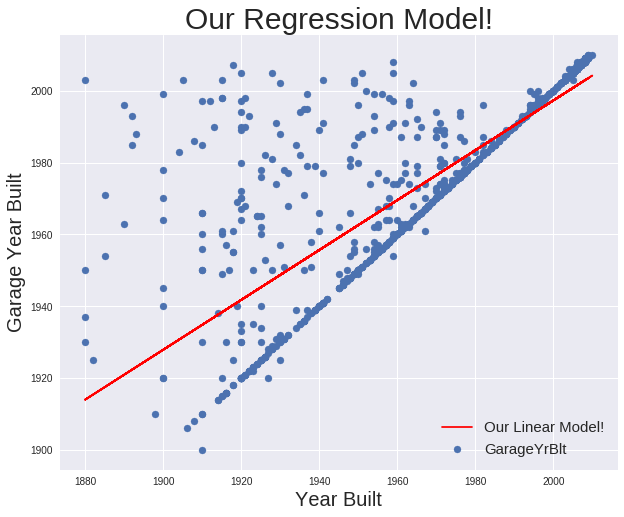

In [18]:
y_pred1 = np.array([my_model1(x) for x in X1])

fig = plt.figure(figsize=(10,8))
plt.scatter(X1,y1)
plt.xlabel('Year Built', fontsize = 20)
plt.ylabel('Garage Year Built', fontsize = 20)
plt.title('Our Regression Model!', fontsize=30)
plt.plot(X1, y_pred1, c='r', label='Our Linear Model!')
plt.legend(fontsize=15)
plt.show()

In [19]:
housing_df.loc[housing_df['GarageYrBlt'].isnull(), 'GarageYrBlt'] = my_model(housing_df.loc[housing_df['GarageYrBlt'].isnull(), 'YearBuilt'])

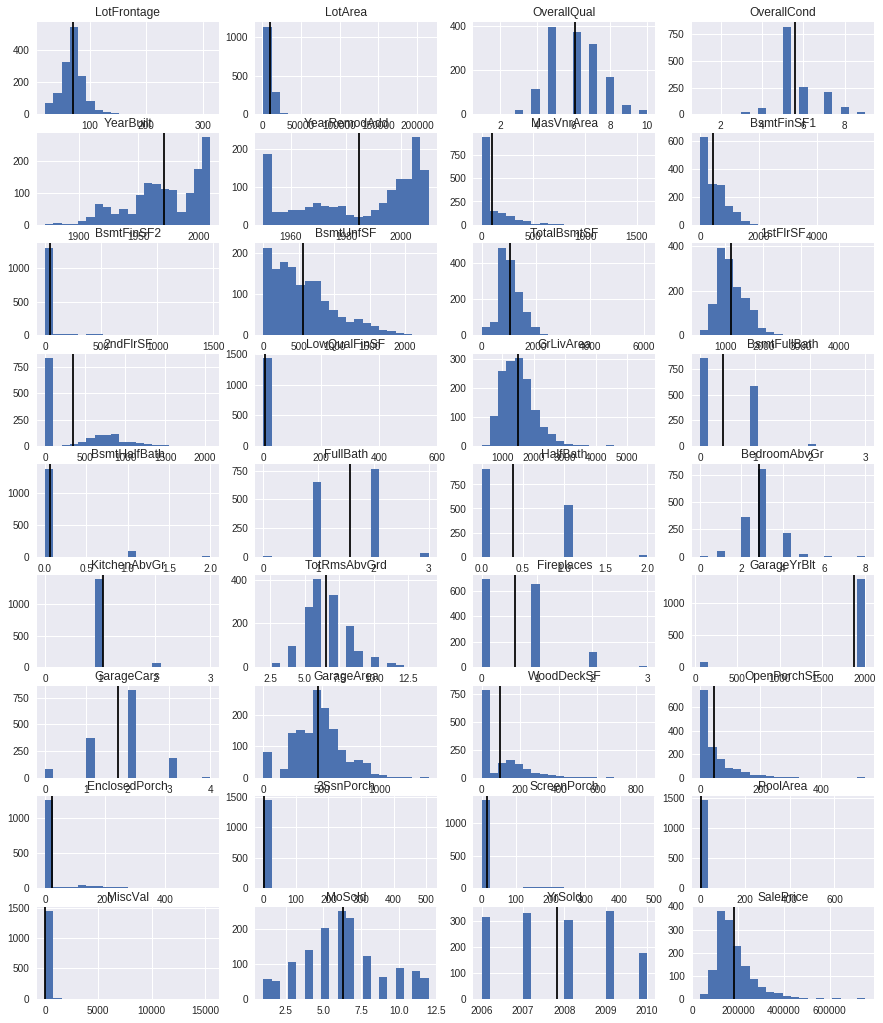

In [20]:
numeric_columns = housing_df.select_dtypes(exclude=['object'])
j = 1
fig = plt.figure(figsize=(15,20))
for i in numeric_columns:
    fig.add_subplot(10,4,j)
    j += 1
    mask = housing_df[i]
    plt.hist(mask, bins = 20)
    plt.title(i)
    plt.axvline(mask.mean(), c='black', label = 'mean')
plt.show()

#### What are your observations? Add them to this markdown cell.

---



### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

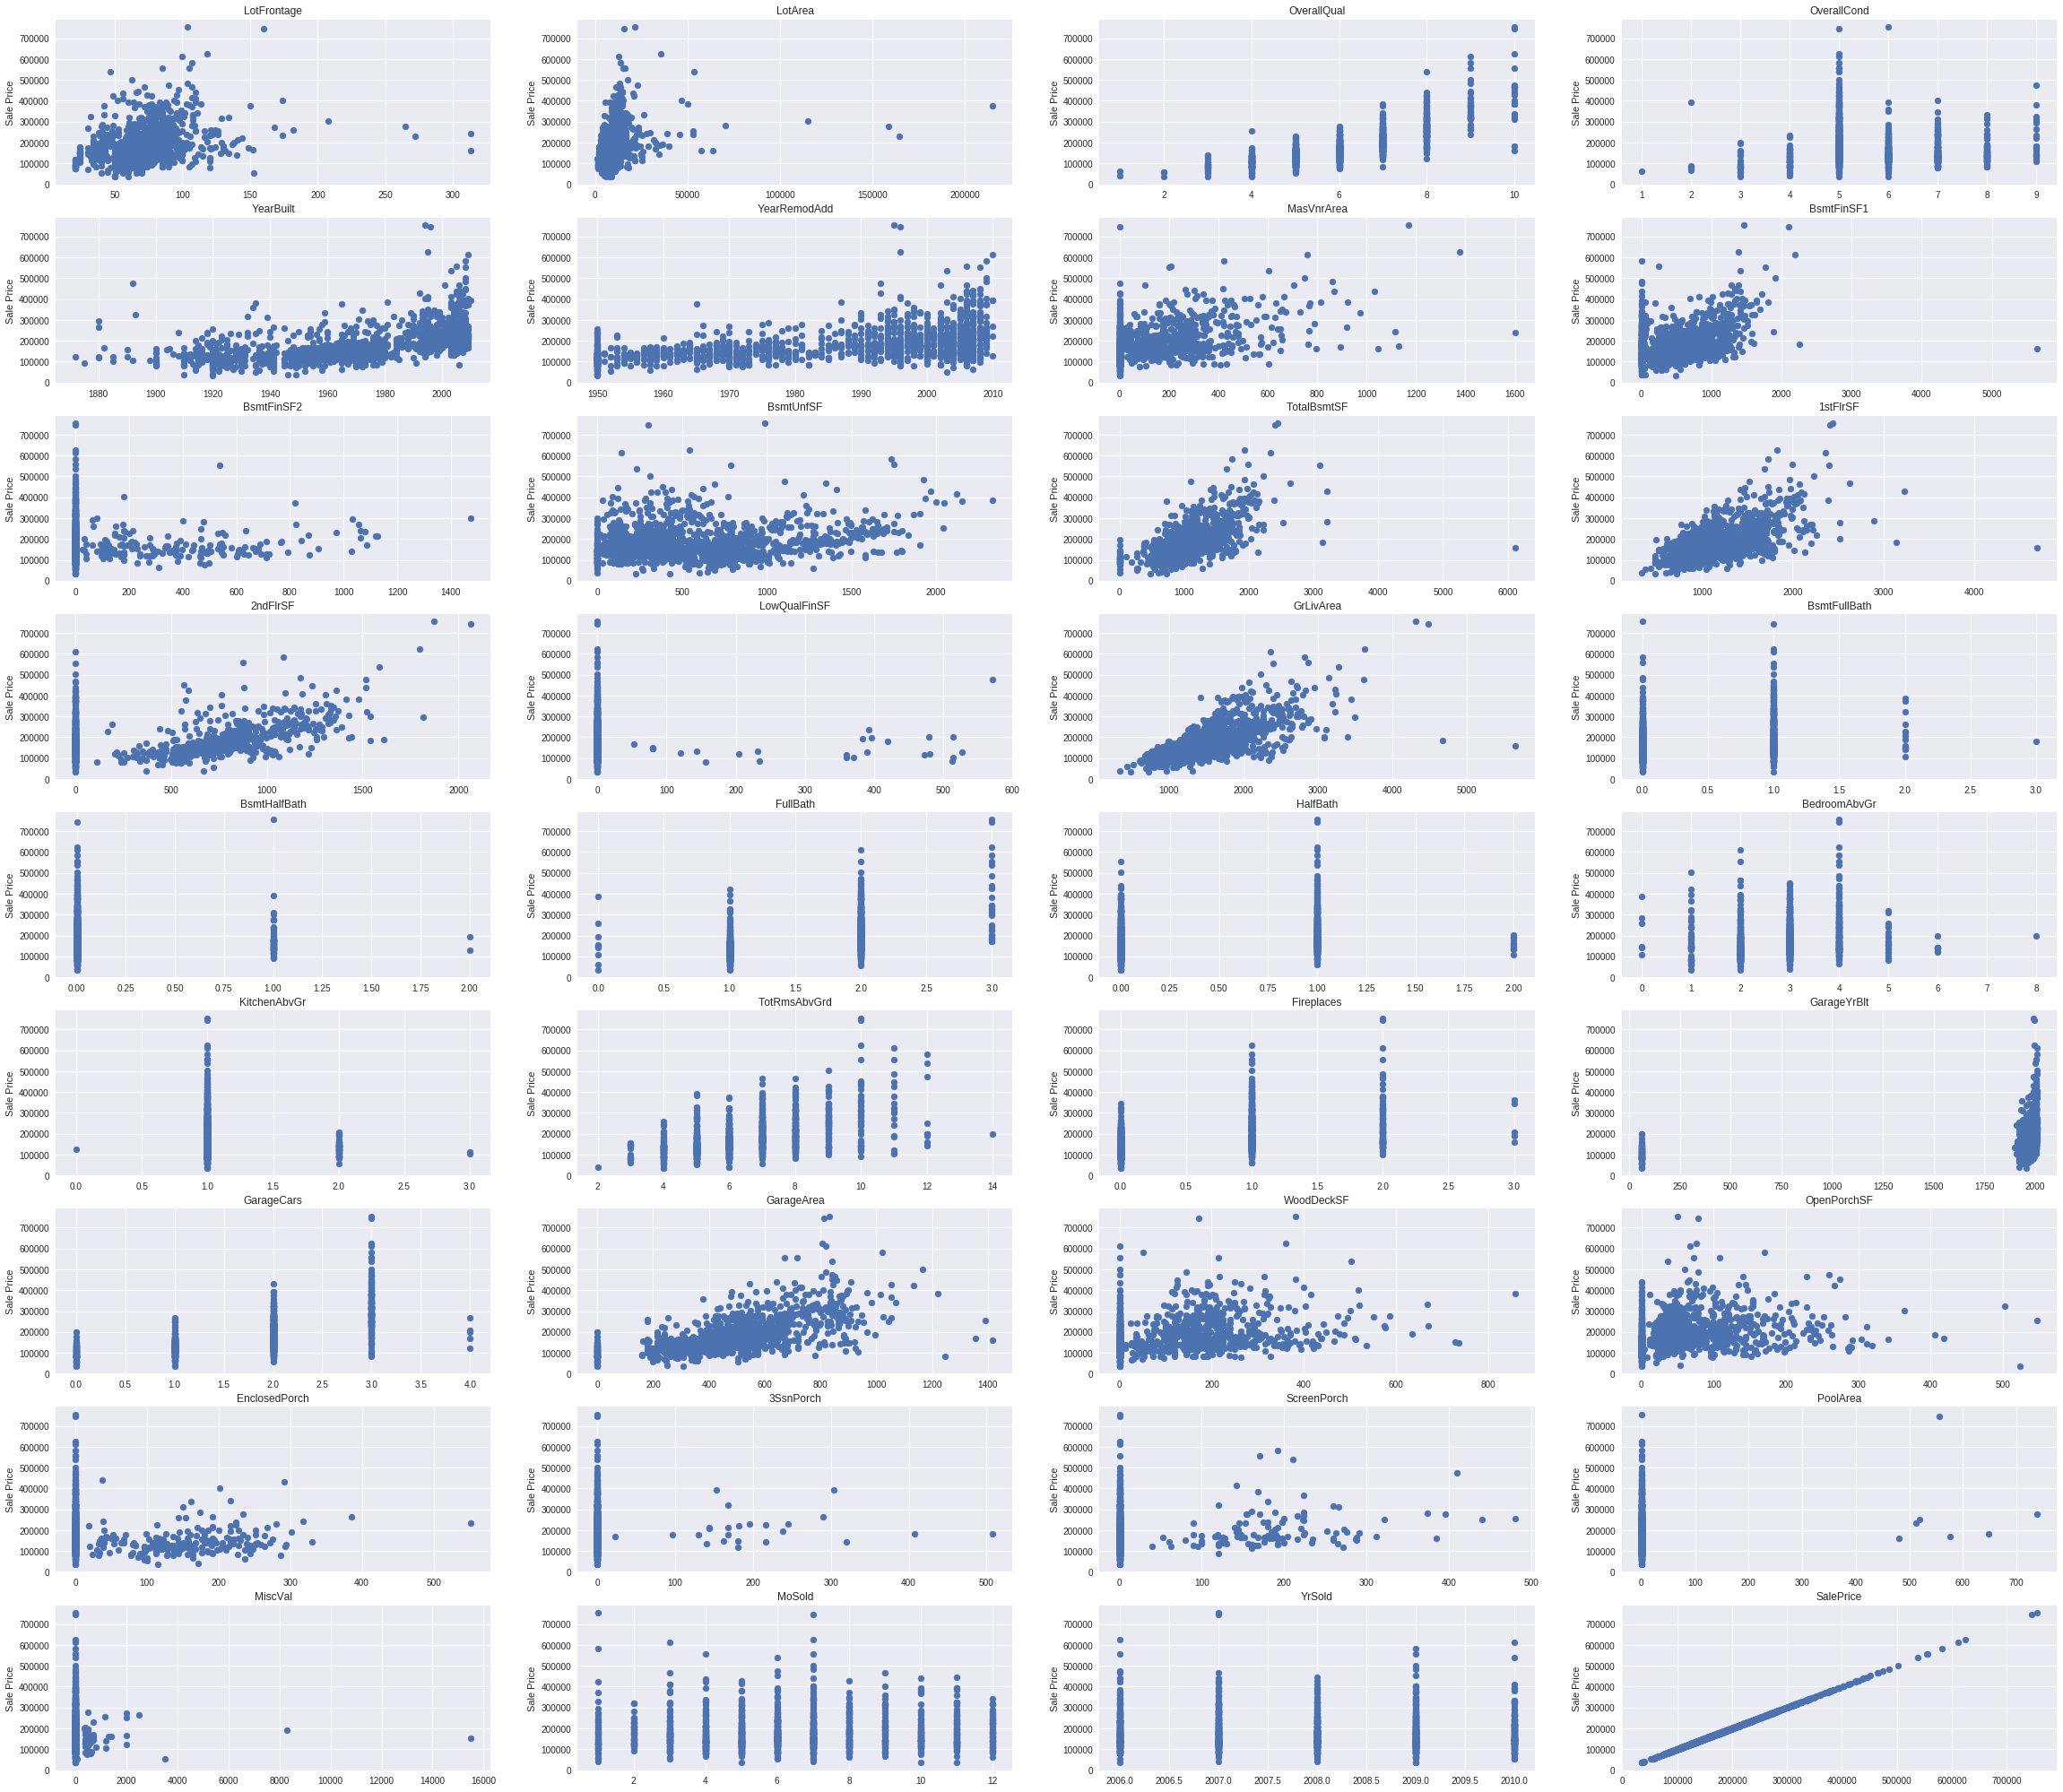

In [21]:
j = 1
fig = plt.figure(figsize=(40,40))
for i in numeric_columns:
    fig.add_subplot(10,4,j)
    j += 1
    mask = housing_df[i]
    plt.scatter(mask, housing_df['SalePrice'])
    plt.ylabel('Sale Price')
    plt.title(i)
plt.show()

#### What are your observations? Add them to this markdown cell.

---



### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

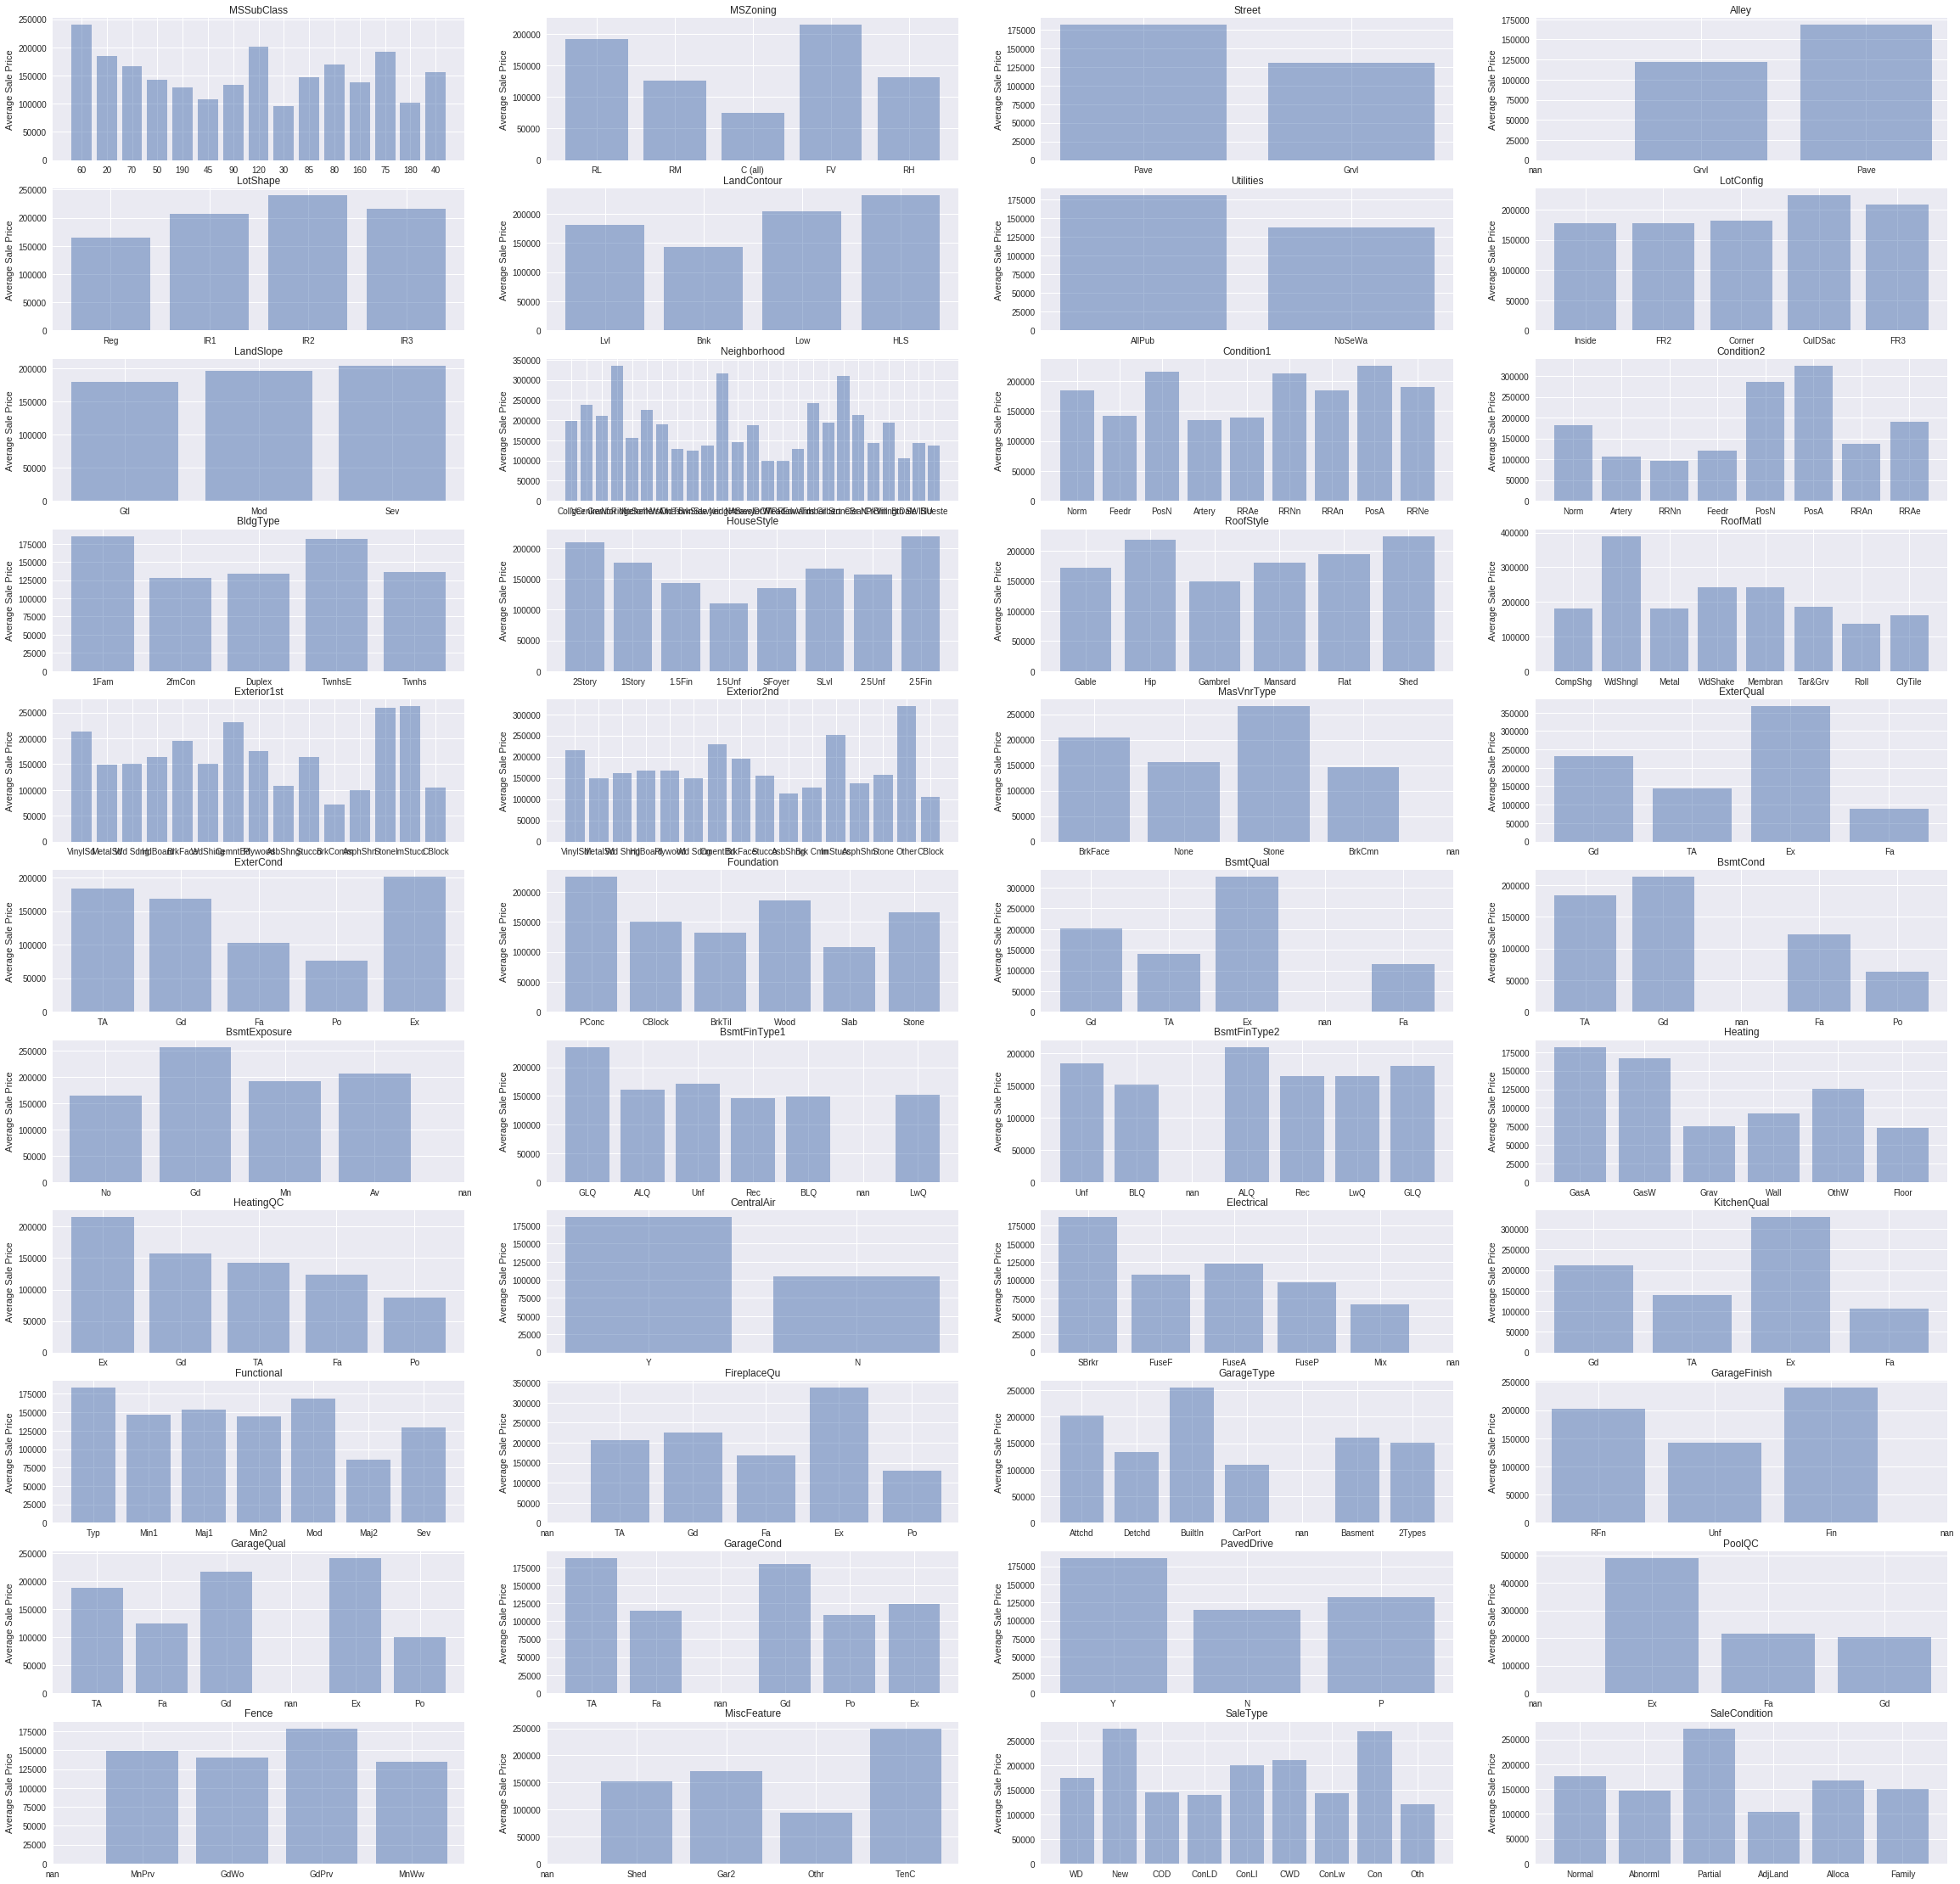

In [128]:
categorical_columns = housing_df.select_dtypes(include=['object'])

j = 1
fig = plt.figure(figsize=(40,40))
for i in categorical_columns:
    fig.add_subplot(11,4,j)
    j += 1
    mask = housing_df[i]

    objects = mask.unique()
    y_pos = np.arange(len(objects))

    performance = []

    for x in objects:
        performance.append(housing_df[mask == x]['SalePrice'].mean())
 
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Average Sale Price')
    plt.title(i)
 
plt.show()

#### What are your observations? Add them to this markdown cell.

---



## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

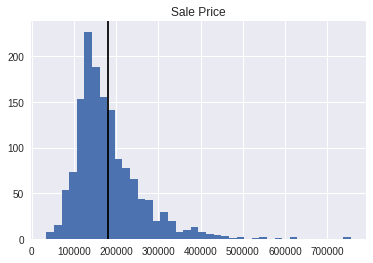

In [23]:
plt.hist(housing_df['SalePrice'], bins=40)
plt.title('Sale Price')
plt.axvline(housing_df['SalePrice'].mean(), c='black', label = 'mean')
plt.show()

In [73]:
iqr = housing_df['SalePrice'].quantile(.75) - housing_df['SalePrice'].quantile(.25)
tukeys = 1.5 * iqr
std = 1.5 * np.std(housing_df['SalePrice'])

An outlier is a value that does not accurately reflect the main distribution of the dataset, because it is too far away from where the standard distribution may lie. In Tukey's Method, this mean it is 1.5 * Standard Deviation away from the mean of the data set in either direction.

In [74]:
high_outliers = housing_df['SalePrice'].mean() + tukeys
low_outliers = housing_df['SalePrice'].mean() - tukeys

display("Using Tukey's Method, the high cutoff is {} and the low cutoff is {}".format(high_outliers, low_outliers))

high_outliers_std = housing_df['SalePrice'].mean() + std
low_outliers_std = housing_df['SalePrice'].mean() - std
display("Using the standard deviation, the high cutoff is {} and the low cutoff is {}".format(high_outliers_std, low_outliers_std))

display("For Tukey's Method, there are {} high outliers and {} low outliers, a total of {} outliers".format(housing_df[housing_df['SalePrice'] > high_outliers]['SalePrice'].count(), housing_df[housing_df['SalePrice'] < low_outliers]['SalePrice'].count(), housing_df[housing_df['SalePrice'] > high_outliers]['SalePrice'].count() + housing_df[housing_df['SalePrice'] < low_outliers]['SalePrice'].count()))

display("For the standard deviation, there are {} high outliers and {} low outliers, a total of {} outliers".format(housing_df[housing_df['SalePrice'] > high_outliers_std]['SalePrice'].count(), housing_df[housing_df['SalePrice'] < low_outliers_std]['SalePrice'].count(), housing_df[housing_df['SalePrice'] > high_outliers_std]['SalePrice'].count() + housing_df[housing_df['SalePrice'] < low_outliers_std]['SalePrice'].count()))

"Using Tukey's Method, the high cutoff is 306958.6958904109 and the low cutoff is 54883.69589041095"

'Using the standard deviation, the high cutoff is 300044.1337195122 and the low cutoff is 61798.25806130968'

"For Tukey's Method, there are 107 high outliers and 7 low outliers, a total of 114 outliers"

'For the standard deviation, there are 115 high outliers and 15 low outliers, a total of 130 outliers'

After running the data for Tukey's Method, there are 7 houses that are considered low outliers and 107 houses that are considered high outliers. These numbers determine that  7.81% of the dataset is considered an outlier. 

For the standard deviation, there are 15 houses that are considered low outliers and 115 houses that are considerd high outliers. These numbers determine that 8.90% of the dataset is considered an outlier.

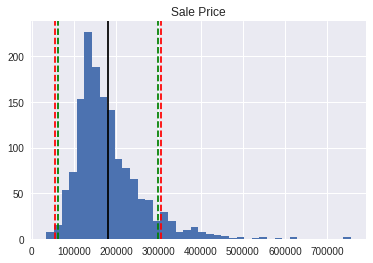

In [75]:
plt.hist(housing_df['SalePrice'], bins=40)
plt.title('Sale Price')
plt.axvline(housing_df['SalePrice'].mean(), c='black', label = 'mean')
plt.axvline(high_outliers, c='red', linestyle ='--')
plt.axvline(low_outliers, c='red', linestyle ='--')
plt.axvline(high_outliers_std, c='green', linestyle ='--')
plt.axvline(low_outliers_std, c='green', linestyle ='--')
plt.show()

Tukey's Method is a good outlier detection, because 7.91% outliers is a healthy size for an outlier dataset, and, although 8.90% is also a healthy size for outliers, for this dataset, I think the extra data is still good to have.

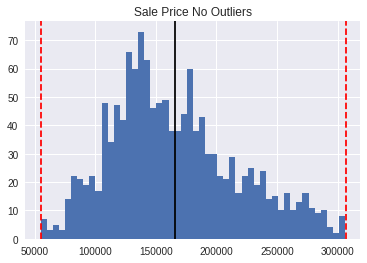

In [313]:
housing = housing_df[housing_df['SalePrice'] >= low_outliers]
new_housing_df = housing[housing['SalePrice'] <= high_outliers]

plt.hist(new_housing_df['SalePrice'], bins=50)
plt.title('Sale Price No Outliers')
plt.axvline(new_housing_df['SalePrice'].mean(), c='black', label = 'mean')
plt.axvline(high_outliers, c='red', linestyle ='--')
plt.axvline(low_outliers, c='red', linestyle ='--')
plt.show()

### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

In [314]:
labels = []

for x in new_housing_df:
    if new_housing_df[new_housing_df[x].isnull()].count()['MSSubClass'] != 0:
        labels.append(x)
        

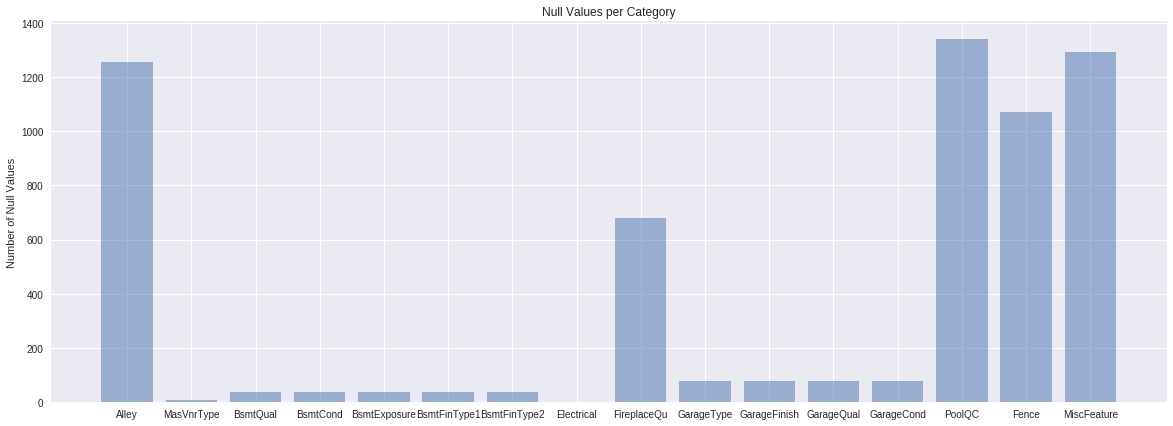

In [315]:
fig = plt.figure(figsize=(20,7))
mask = []
for i in labels:
    mask.append(new_housing_df[new_housing_df[i].isnull()].count()['MSSubClass'])

plt.bar(np.arange(len(labels)), mask, align='center', alpha=0.5)
plt.xticks(np.arange(len(labels)), labels)
plt.ylabel('Number of Null Values')
plt.title('Null Values per Category')
 
plt.show()

Alley: either 'Grvl' or 'Pave'. nan stands for "No Alley Access", therefore I will change to NAA (No Alley Access).

MasVnrType: 'BrkFace', 'None', 'Stone', or 'BrkCmn'. In this case, I am choosing to replace the nan values with 'None'.

BsmtQual: 'Gd', 'TA', 'Ex', 'Fa', or 'NA'. 'NA' stands for 'No Basement' so I am changing this to 'NB'.

BsmtCond: 'Ex', 'Gd', 'TA', 'Fa', 'Po' or 'NA'. 'NA' stands for 'No Basement' so I am changing this to 'NB'.

BsmtExposure: In BsmtQual and BsmtCond, 36 houses did not have a basement. For BsmtExposure, there are 37 values, which means 36 should be replaced with 'NB'. The other basement is not finished with construction and I am therefore setting it to Average Exposure (since it is unknown) 'Av'. (949)

BsmtFinType1: Has 36 values, i.e. 'NB'.

BsmtFinType2: Has 37 values, 36 will be set to 'NB' and the other will be set to the mode value of 'Unf' since 87.5% of the values are 'Unf'. (333)

Electrical: Only 1 null value. The mode value of 'SBrkr' appears 91% of the time, so will replace null with this.

FireplaceQu:'NA' means No Fireplace so will replace with 'NF'.

GarageType: For all 4 Garage metrics (GarageType, GarageFinish, GarageQual, and GarageCond) there are 76 missing values. In the data description, 'NA' means that there is no garage. For all 4 metrics, I will change 'NA' to 'NG'.

GarageFinish: 'NA' to 'NG'.

GarageQual: 'NA' to 'NG'.

GarageCond: 'NA' to 'NG'.

PoolQC: 'NA' means no pool. Change to 'NP'.

Fence: 'NA' means no fence. Change to 'NF'.

MiscFeature: 'NA' means none. Will replace with 'None'

In [316]:
new_housing_df.loc[new_housing_df['Alley'].isnull(), 'Alley'] = 'NAA'
new_housing_df.loc[new_housing_df['MasVnrType'].isnull(), 'MasVnrType'] = 'None'
new_housing_df.loc[new_housing_df['BsmtQual'].isnull(), 'BsmtQual'] = 'NB'
new_housing_df.loc[new_housing_df['BsmtCond'].isnull(), 'BsmtCond'] = 'NB'
new_housing_df.loc[new_housing_df['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'NB'
new_housing_df.loc[new_housing_df['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'NB'
new_housing_df.loc[new_housing_df['BsmtExposure'].isnull(), 'BsmtExposure'] = 'NB'
new_housing_df.loc[new_housing_df['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
new_housing_df.loc[new_housing_df['FireplaceQu'].isnull(), 'FireplaceQu'] = 'NF'
new_housing_df.loc[new_housing_df['GarageType'].isnull(), 'GarageType'] = 'NG'
new_housing_df.loc[new_housing_df['GarageFinish'].isnull(), 'GarageFinish'] = 'NG'
new_housing_df.loc[new_housing_df['GarageQual'].isnull(), 'GarageQual'] = 'NG'
new_housing_df.loc[new_housing_df['GarageCond'].isnull(), 'GarageCond'] = 'NG'
new_housing_df.loc[new_housing_df['PoolQC'].isnull(), 'PoolQC'] = 'NP'
new_housing_df.loc[new_housing_df['Fence'].isnull(), 'Fence'] = 'NF'
new_housing_df.loc[new_housing_df['MiscFeature'].isnull(), 'MiscFeature'] = 'None'
new_housing_df.loc[949, 'BsmtExposure'] = 'Av'
new_housing_df.loc[333, 'BsmtFinType2'] = 'Unf'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Verify that you have *truly* eliminated all the null values!

In [317]:
labels = []

for x in new_housing_df:
    if new_housing_df[new_housing_df[x].isnull()].count()['MSSubClass'] != 0:
        labels.append(x)

display(labels)

[]

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [318]:
practice_df = new_housing_df

In [ ]:
categories = new_housing_df.select_dtypes(include=['object'])
category = categories.columns
for x in category:
    dummy = pd.get_dummies(practice_df[x], x, drop_first=True)
    dummy_practice = practice_df.join(dummy)
    practice_df = dummy_practice.drop(x, 1)
    

In [327]:
display(practice_df.head())

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,...,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NG,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NG,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NP,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [329]:
from sklearn.model_selection import train_test_split

In [353]:
X_train, X_test, y_train, y_test = train_test_split(practice_df, practice_df['SalePrice'], random_state = 42)

In [432]:
X_train = X_train.drop('SalePrice', 1)
X_test = X_test.drop('SalePrice', 1)
display(X_train.info())
display(X_train.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 397 to 1226
Columns: 270 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(32), uint8(235)
memory usage: 515.3 KB


None

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NG,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NG,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NP,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
397,60.000000,7200,5,5,1972,1972,0.0,777,0,117,894,894,0,0,894,0,0,1,0,2,1,6,0,1985.0,2,600,215,0,0,0,0,0,0,9,2009,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
385,126.402098,53107,6,5,1992,1992,0.0,985,0,595,1580,1079,874,0,1953,1,0,2,1,3,1,9,2,1992.0,2,501,216,231,0,0,0,0,0,6,2007,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
339,91.000000,14145,7,7,1984,1998,0.0,213,0,995,1208,1621,0,0,1621,1,0,2,0,3,1,8,0,1984.0,2,440,108,45,0,0,0,0,400,5,2006,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
464,74.000000,11988,6,7,1934,1995,0.0,326,0,389,715,849,811,0,1660,0,0,1,1,3,1,6,1,1939.0,1,240,0,0,0,0,0,0,0,8,2008,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
564,66.000000,21780,6,7,1918,1950,0.0,0,0,1163,1163,1163,511,0,1674,0,0,2,0,4,1,8,1,1955.0,2,396,72,36,0,0,144,0,0,7,2008,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [433]:
display(X_test.info())
display(X_test.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 979 to 1366
Columns: 270 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(32), uint8(235)
memory usage: 172.1 KB


None

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NG,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NG,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NP,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
979,68.0,9450,4,5,1954,1954,0.0,552,0,342,894,894,0,0,894,0,0,1,0,3,1,5,0,1999.0,2,400,0,0,0,0,0,0,0,5,2007,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1241,65.0,8158,7,5,2003,2003,252.0,550,0,334,884,884,884,0,1768,1,0,2,1,3,1,8,0,2003.0,2,543,0,63,0,0,0,0,0,7,2008,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
372,80.0,17120,4,4,1959,1959,0.0,0,0,0,0,1120,468,0,1588,0,0,2,0,4,1,7,1,1991.0,2,680,0,59,0,0,0,0,0,7,2008,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
765,30.0,9549,8,5,1995,1996,0.0,437,1057,0,1494,1494,0,0,1494,1,0,1,1,2,1,6,1,1995.0,2,481,0,30,0,0,216,0,0,4,2006,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
302,66.0,16226,8,5,1998,1999,0.0,281,0,747,1028,1210,1242,0,2452,0,0,2,1,4,1,9,1,1998.0,2,683,208,50,0,0,0,0,0,5,2007,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [434]:
display(y_train.head())

Id
397    123000
385    240000
339    202500
464    188700
564    185000
Name: SalePrice, dtype: int64

In [435]:
display(y_test.head())

Id
979     110000
1241    224900
372     134432
765     270000
302     267000
Name: SalePrice, dtype: int64

We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [436]:
from sklearn.preprocessing import StandardScaler

In [437]:
ss = StandardScaler()
X_train_fit = ss.fit_transform(X_train)
X_test_fit = ss.transform(X_test)

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [438]:
from sklearn.linear_model import LinearRegression

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

This is the pattern you will be using:

In [439]:
example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

Then we pass the results list to pass to a DataFrame.

In [440]:
pd.DataFrame(example_results)

,dataset,name,preprocessing,score
0,train,test1,raw,1 bajillion
1,train,test1,scaled,20 bajillion


This gives us a convenient tool for manipulating our results and tracking our work ... our old friend, Pandas!

#### Make a new results list.

In [461]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [462]:
benchmark_raw = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [463]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [464]:
benchmark_scaled = LinearRegression()

In [465]:
benchmark_scaled.fit(X_train_fit, y_train)
scaled_train_score = benchmark_scaled.score(X_train_fit, y_train)
scaled_test_score = benchmark_scaled.score(X_test_fit, y_test)

results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

Use a DataFrame to display your results.

In [466]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.388300e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,5.139048e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.385200e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.891897e+22


#### What are your observations? Add them to this markdown cell.

---


### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [467]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [468]:
ridge_raw = Ridge()

In [469]:
ridge_raw.fit(X_train, y_train)
ridge_raw_train_score = ridge_raw.score(X_train, y_train)
ridge_raw_test_score = ridge_raw.score(X_test, y_test)

results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': ridge_raw_train_score})
results.append({'name':'ridge',
                'model':ridge_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': ridge_raw_test_score})

In [470]:
ridge_scaled = Ridge()

In [471]:
ridge_scaled.fit(X_train_fit, y_train)
ridge_scaled_train_score = ridge_scaled.score(X_train_fit, y_train)
ridge_scaled_test_score = ridge_scaled.score(X_test_fit, y_test)

results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': ridge_scaled_train_score})
results.append({'name':'ridge',
                'model':ridge_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': ridge_scaled_test_score})

In [472]:
lasso_raw = Lasso()

In [473]:
lasso_raw.fit(X_train, y_train)
lasso_raw_train_score = lasso_raw.score(X_train, y_train)
lasso_raw_test_score = lasso_raw.score(X_test, y_test)

results.append({'name':'lasso',
                'model':lasso_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': lasso_raw_train_score})
results.append({'name':'lasso',
                'model':lasso_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': lasso_raw_test_score})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [474]:
lasso_scaled = Lasso()

In [475]:
lasso_scaled.fit(X_train_fit, y_train)
lasso_scaled_train_score = lasso_scaled.score(X_train_fit, y_train)
lasso_scaled_test_score = lasso_scaled.score(X_test_fit, y_test)

results.append({'name':'lasso',
                'model':lasso_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': lasso_scaled_train_score})
results.append({'name':'lasso',
                'model':lasso_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': lasso_scaled_test_score})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [476]:
elasticnet_raw = ElasticNet()

In [477]:
elasticnet_raw.fit(X_train, y_train)
elasticnet_raw_train_score = elasticnet_raw.score(X_train, y_train)
elasticnet_raw_test_score = elasticnet_raw.score(X_test, y_test)

results.append({'name':'elasticnet',
                'model':elasticnet_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': elasticnet_raw_train_score})
results.append({'name':'elasticnet',
                'model':elasticnet_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': elasticnet_raw_test_score})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [478]:
elasticnet_scaled = ElasticNet()

In [479]:
elasticnet_scaled.fit(X_train_fit, y_train)
elasticnet_scaled_train_score = elasticnet_scaled.score(X_train_fit, y_train)
elasticnet_scaled_test_score = elasticnet_scaled.score(X_test_fit, y_test)

results.append({'name':'elasticnet',
                'model':elasticnet_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': elasticnet_scaled_train_score})
results.append({'name':'elasticnet',
                'model':elasticnet_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': elasticnet_scaled_test_score})

Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [480]:
results_df = pd.DataFrame(results)
results_df

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.388300e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,5.139048e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.385200e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.891897e+22
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,9.150779e-01
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,8.096648e-01
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,9.385715e-01
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,4.423098e-01
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,9.386325e-01
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,4.522208e-01


#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [482]:
display(results_df[(results_df.preprocessing == 'raw') & (results_df.dataset == 'test')])

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.513905
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.809665
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.452221
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elasticnet,raw,0.800155


#### What are your observations? Add them to this markdown cell.

---



#### Display just the scaled test results

In [483]:
display(results_df[(results_df.preprocessing == 'scaled') & (results_df.dataset == 'test')])

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.891897e+22
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,4.423098e-01
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,3.637148e-01
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elasticnet,scaled,8.335232e-01


#### What are your observations? Add them to this markdown cell.

---



These are your benchmark results. You will refer to these for analysis during the next phase.

#### Display just the Benchmark models

In [484]:
display(results_df[(results_df.name == 'benchmark')])

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.388300e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,5.139048e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.385200e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.891897e+22


#### Display just the Ridge models

In [485]:
display(results_df[(results_df.name == 'ridge')])

,dataset,model,name,preprocessing,score
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.915078
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.809665
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.938572
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.442310


#### Display just the Lasso models

In [486]:
display(results_df[(results_df.name == 'lasso')])

,dataset,model,name,preprocessing,score
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.938633
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.452221
10,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,0.938755
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,0.363715


#### Display just the Elasticnet models

In [487]:
display(results_df[(results_df.name == 'elasticnet')])

,dataset,model,name,preprocessing,score
12,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elasticnet,raw,0.825918
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elasticnet,raw,0.800155
14,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elasticnet,scaled,0.886310
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elasticnet,scaled,0.833523


#### What are your observations? Add them to this markdown cell.

---



### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [609]:
cv_results = list()

In [610]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [611]:
ridge_cv_scaled = RidgeCV(alphas = np.logspace(-2, 4, 7))

In [612]:
ridge_cv_scaled.fit(X_train_fit, y_train)
ridge_cv_scaled_train_score = ridge_cv_scaled.score(X_train_fit, y_train)
ridge_cv_scaled_test_score = ridge_cv_scaled.score(X_test_fit, y_test)

cv_results.append({'name':'ridgecv',
                'model':ridge_cv_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': ridge_cv_scaled_train_score})
cv_results.append({'name':'ridgecv',
                'model':ridge_cv_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': ridge_cv_scaled_test_score})

In [613]:
ridge_cv_raw = RidgeCV(alphas = np.logspace(-2, 4, 7))

In [614]:
ridge_cv_raw.fit(X_train, y_train)
ridge_cv_raw_train_score = ridge_cv_raw.score(X_train, y_train)
ridge_cv_raw_test_score = ridge_cv_raw.score(X_test, y_test)

cv_results.append({'name':'ridgecv',
                'model':ridge_cv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': ridge_cv_raw_train_score})
cv_results.append({'name':'ridgecv',
                'model':ridge_cv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': ridge_cv_raw_test_score})

In [615]:
lasso_cv_scaled = LassoCV(alphas = np.logspace(-2, 4, 7))

In [616]:
lasso_cv_scaled.fit(X_train_fit, y_train)
lasso_cv_scaled_train_score = lasso_cv_scaled.score(X_train_fit, y_train)
lasso_cv_scaled_test_score = lasso_cv_scaled.score(X_test_fit, y_test)

cv_results.append({'name':'lassocv',
                'model':lasso_cv_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': lasso_cv_scaled_train_score})
cv_results.append({'name':'lassocv',
                'model':lasso_cv_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': lasso_cv_scaled_test_score})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [617]:
lasso_cv_raw = LassoCV(alphas = np.logspace(-2, 4, 7))

In [618]:
lasso_cv_raw.fit(X_train, y_train)
lasso_cv_raw_train_score = lasso_cv_raw.score(X_train, y_train)
lasso_cv_raw_test_score = lasso_cv_raw.score(X_test, y_test)

cv_results.append({'name':'lassocv',
                'model':lasso_cv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': lasso_cv_raw_train_score})
cv_results.append({'name':'lassocv',
                'model':lasso_cv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': lasso_cv_raw_test_score})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [619]:
elasticnet_cv_scaled = ElasticNetCV(alphas = np.logspace(-2, 4, 7))

In [620]:
elasticnet_cv_scaled.fit(X_train_fit, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]),
       copy_X=True, cv=None, eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [621]:
elasticnet_cv_scaled_train_score = elasticnet_cv_scaled.score(X_train_fit, y_train)
elasticnet_cv_scaled_test_score = elasticnet_cv_scaled.score(X_test_fit, y_test)

cv_results.append({'name':'elasticnetcv',
                'model':elasticnet_cv_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': elasticnet_cv_scaled_train_score})
cv_results.append({'name':'elasticnetcv',
                'model':elasticnet_cv_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': elasticnet_cv_scaled_test_score})

In [622]:
elasticnet_cv_raw = ElasticNetCV(alphas = np.logspace(-2, 4, 7))

In [623]:
elasticnet_cv_raw.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]),
       copy_X=True, cv=None, eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [624]:
elasticnet_cv_raw_train_score = elasticnet_cv_raw.score(X_train, y_train)
elasticnet_cv_raw_test_score = elasticnet_cv_raw.score(X_test, y_test)

cv_results.append({'name':'elasticnetcv',
                'model':elasticnet_cv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': elasticnet_cv_raw_train_score})
cv_results.append({'name':'elasticnetcv',
                'model':elasticnet_cv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': elasticnet_cv_raw_test_score})

#### Display just the raw test results

In [625]:
cv_results_df = pd.DataFrame(cv_results)

In [626]:
display(cv_results_df[(cv_results_df.preprocessing == 'raw') & (cv_results_df.dataset == 'test')])

,dataset,model,name,preprocessing,score
3,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridgecv,raw,0.838514
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lassocv,raw,0.836248
11,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elasticnetcv,raw,0.834655


#### Display just the scaled test results

In [627]:
display(cv_results_df[(cv_results_df.preprocessing == 'scaled') & (cv_results_df.dataset == 'test')])

,dataset,model,name,preprocessing,score
1,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridgecv,scaled,0.835883
5,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lassocv,scaled,0.814517
9,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elasticnetcv,scaled,0.833523


### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 

In [628]:
display(cv_results_df)
display(results_df)

,dataset,model,name,preprocessing,score
0,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridgecv,scaled,0.866363
1,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridgecv,scaled,0.835883
2,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridgecv,raw,0.896188
3,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridgecv,raw,0.838514
4,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lassocv,scaled,0.877252
5,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lassocv,scaled,0.814517
6,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lassocv,raw,0.886486
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lassocv,raw,0.836248
8,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elasticnetcv,scaled,0.886310
9,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elasticnetcv,scaled,0.833523


,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.388300e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,5.139048e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.385200e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.891897e+22
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,9.150779e-01
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,8.096648e-01
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,9.385715e-01
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,4.423098e-01
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,9.386325e-01
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,4.522208e-01


In [629]:
def residuals(y_pred, y_actual):
    return y_pred - y_actual

In [630]:
def mae(y_pred, y_actual):
    return abs(residuals(y_pred, y_actual)).mean()

In [631]:
def mse(y_pred, y_actual):
    return (residuals(y_pred, y_actual)**2).mean()

In [632]:
def rmse(y_pred, y_actual):
    return np.sqrt(mse(y_pred, y_actual))

In [633]:
def sstot(y_actual):
    return ((y_actual - y_actual.mean())**2).sum()

def sse(y_pred, y_actual):
    return (residuals(y_pred, y_actual)**2).sum()

def r2(y_pred, y_actual):
    return 1 - (sse(y_pred, y_actual) / sstot(y_actual))

In [634]:
benchmark_raw_pred = benchmark_raw.predict(X_test)
benchmark_scaled_pred = benchmark_scaled.predict(X_test_fit)
ridge_raw_pred = ridge_raw.predict(X_test)
ridge_scaled_pred = ridge_scaled.predict(X_test_fit)
ridge_cv_raw_pred = ridge_cv_raw.predict(X_test)
ridge_cv_scaled_pred = ridge_cv_scaled.predict(X_test_fit)
lasso_raw_pred = lasso_raw.predict(X_test)
lasso_scaled_pred = lasso_scaled.predict(X_test_fit)
lasso_cv_raw_pred = lasso_cv_raw.predict(X_test)
lasso_cv_scaled_pred = lasso_cv_scaled.predict(X_test_fit)
elasticnet_raw_pred = elasticnet_raw.predict(X_test)
elasticnet_scaled_pred = elasticnet_raw.predict(X_test_fit)
elasticnet_cv_raw_pred = elasticnet_cv_raw.predict(X_test)
elasticnet_cv_scaled_pred = elasticnet_cv_scaled.predict(X_test_fit)

In [635]:
benchmark_raw_mae = mae(benchmark_raw_pred, y_test)
benchmark_raw_mse = mse(benchmark_raw_pred, y_test)
benchmark_raw_rmse = rmse(benchmark_raw_pred, y_test)
benchmark_raw_r2 = r2(benchmark_raw_pred, y_test)

In [636]:
benchmark_scaled_mae = mae(benchmark_scaled_pred, y_test)
benchmark_scaled_mse = mse(benchmark_scaled_pred, y_test)
benchmark_scaled_rmse = rmse(benchmark_scaled_pred, y_test)
benchmark_scaled_r2 = r2(benchmark_scaled_pred, y_test)

In [637]:
ridge_raw_mae = mae(ridge_raw_pred, y_test)
ridge_raw_mse = mse(ridge_raw_pred, y_test)
ridge_raw_rmse = rmse(ridge_raw_pred, y_test)
ridge_raw_r2 = r2(ridge_raw_pred, y_test)

In [638]:
ridge_scaled_mae = mae(ridge_scaled_pred, y_test)
ridge_scaled_mse = mse(ridge_scaled_pred, y_test)
ridge_scaled_rmse = rmse(ridge_scaled_pred, y_test)
ridge_scaled_r2 = r2(ridge_scaled_pred, y_test)

In [639]:
ridge_cv_raw_mae = mae(ridge_cv_raw_pred, y_test)
ridge_cv_raw_mse = mse(ridge_cv_raw_pred, y_test)
ridge_cv_raw_rmse = rmse(ridge_cv_raw_pred, y_test)
ridge_cv_raw_r2 = r2(ridge_cv_raw_pred, y_test)

In [640]:
ridge_cv_scaled_mae = mae(ridge_cv_scaled_pred, y_test)
ridge_cv_scaled_mse = mse(ridge_cv_scaled_pred, y_test)
ridge_cv_scaled_rmse = rmse(ridge_cv_scaled_pred, y_test)
ridge_cv_scaled_r2 = r2(ridge_cv_scaled_pred, y_test)

In [641]:
lasso_raw_mae = mae(lasso_raw_pred, y_test)
lasso_raw_mse = mse(lasso_raw_pred, y_test)
lasso_raw_rmse = rmse(lasso_raw_pred, y_test)
lasso_raw_r2 = r2(lasso_raw_pred, y_test)

In [642]:
lasso_scaled_mae = mae(lasso_scaled_pred, y_test)
lasso_scaled_mse = mse(lasso_scaled_pred, y_test)
lasso_scaled_rmse = rmse(lasso_scaled_pred, y_test)
lasso_scaled_r2 = r2(lasso_scaled_pred, y_test)

In [643]:
lasso_cv_raw_mae = mae(lasso_cv_raw_pred, y_test)
lasso_cv_raw_mse = mse(lasso_cv_raw_pred, y_test)
lasso_cv_raw_rmse = rmse(lasso_cv_raw_pred, y_test)
lasso_cv_raw_r2 = r2(lasso_cv_raw_pred, y_test)

In [644]:
lasso_cv_scaled_mae = mae(lasso_cv_scaled_pred, y_test)
lasso_cv_scaled_mse = mse(lasso_cv_scaled_pred, y_test)
lasso_cv_scaled_rmse = rmse(lasso_cv_scaled_pred, y_test)
lasso_cv_scaled_r2 = r2(lasso_cv_scaled_pred, y_test)

In [645]:
elasticnet_raw_mae = mae(elasticnet_raw_pred, y_test)
elasticnet_raw_mse = mse(elasticnet_raw_pred, y_test)
elasticnet_raw_rmse = rmse(elasticnet_raw_pred, y_test)
elasticnet_raw_r2 = r2(elasticnet_raw_pred, y_test)

In [646]:
elasticnet_scaled_mae = mae(elasticnet_scaled_pred, y_test)
elasticnet_scaled_mse = mse(elasticnet_scaled_pred, y_test)
elasticnet_scaled_rmse = rmse(elasticnet_scaled_pred, y_test)
elasticnet_scaled_r2 = r2(elasticnet_scaled_pred, y_test)

In [647]:
elasticnet_cv_raw_mae = mae(elasticnet_cv_raw_pred, y_test)
elasticnet_cv_raw_mse = mse(elasticnet_cv_raw_pred, y_test)
elasticnet_cv_raw_rmse = rmse(elasticnet_cv_raw_pred, y_test)
elasticnet_cv_raw_r2 = r2(elasticnet_cv_raw_pred, y_test)

In [648]:
elasticnet_cv_scaled_mae = mae(elasticnet_cv_scaled_pred, y_test)
elasticnet_cv_scaled_mse = mse(elasticnet_cv_scaled_pred, y_test)
elasticnet_cv_scaled_rmse = rmse(elasticnet_cv_scaled_pred, y_test)
elasticnet_cv_scaled_r2 = r2(elasticnet_cv_scaled_pred, y_test)

In [649]:
errors_list = list()

In [650]:
errors_list.append({'name':'benchmark',
                'model':benchmark_raw,
                'preprocessing': 'raw',
                'train score': raw_train_score,
                'test score': raw_test_score,
                   'mae':benchmark_raw_mae,
                   'mse':benchmark_raw_mse,
                   'rmse':benchmark_raw_rmse,
                   'r2':benchmark_raw_r2})
errors_list.append({'name':'benchmark',
                'model':benchmark_scaled,
                'preprocessing': 'scaled',
                'train score': scaled_train_score,
                'test score': scaled_test_score,
                   'mae':benchmark_scaled_mae,
                   'mse':benchmark_scaled_mse,
                   'rmse':benchmark_scaled_rmse,
                   'r2':benchmark_scaled_r2})
errors_list.append({'name':'ridge',
                'model':ridge_raw,
                'preprocessing': 'raw',
                'train score': ridge_raw_train_score,
                'test score': ridge_raw_test_score,
                   'mae':ridge_raw_mae,
                   'mse':ridge_raw_mse,
                   'rmse':ridge_raw_rmse,
                   'r2':ridge_raw_r2})
errors_list.append({'name':'ridge',
                'model':ridge_scaled,
                'preprocessing': 'scaled',
                'train score': ridge_scaled_train_score,
                'test score': ridge_scaled_test_score,
                   'mae':ridge_scaled_mae,
                   'mse':ridge_scaled_mse,
                   'rmse':ridge_scaled_rmse,
                   'r2':ridge_scaled_r2})
errors_list.append({'name':'ridgecv',
                'model':ridge_cv_raw,
                'preprocessing': 'raw',
                'train score': ridge_cv_raw_train_score,
                'test score': ridge_cv_raw_test_score,
                   'mae':ridge_cv_raw_mae,
                   'mse':ridge_cv_raw_mse,
                   'rmse':ridge_cv_raw_rmse,
                   'r2':ridge_cv_raw_r2})
errors_list.append({'name':'ridgecv',
                'model':ridge_cv_scaled,
                'preprocessing': 'scaled',
                'train score': ridge_cv_scaled_train_score,
                'test score': ridge_cv_scaled_test_score,
                   'mae':ridge_cv_scaled_mae,
                   'mse':ridge_cv_scaled_mse,
                   'rmse':ridge_cv_scaled_rmse,
                   'r2':ridge_cv_scaled_r2})
errors_list.append({'name':'lasso',
                'model':lasso_raw,
                'preprocessing': 'raw',
                'train score': lasso_raw_train_score,
                'test score': lasso_raw_test_score,
                   'mae':lasso_raw_mae,
                   'mse':lasso_raw_mse,
                   'rmse':lasso_raw_rmse,
                   'r2':lasso_raw_r2})
errors_list.append({'name':'lasso',
                'model':lasso_scaled,
                'preprocessing': 'scaled',
                'train score': lasso_scaled_train_score,
                'test score': lasso_scaled_test_score,
                   'mae':lasso_scaled_mae,
                   'mse':lasso_scaled_mse,
                   'rmse':lasso_scaled_rmse,
                   'r2':lasso_scaled_r2})
errors_list.append({'name':'lassocv',
                'model':lasso_cv_raw,
                'preprocessing': 'raw',
                'train score': lasso_cv_raw_train_score,
                'test score': lasso_cv_raw_test_score,
                   'mae':lasso_cv_raw_mae,
                   'mse':lasso_cv_raw_mse,
                   'rmse':lasso_cv_raw_rmse,
                   'r2':lasso_cv_raw_r2})
errors_list.append({'name':'lassocv',
                'model':lasso_scaled,
                'preprocessing': 'scaled',
                'train score': lasso_cv_scaled_train_score,
                'test score': lasso_cv_scaled_test_score,
                   'mae':lasso_cv_scaled_mae,
                   'mse':lasso_cv_scaled_mse,
                   'rmse':lasso_cv_scaled_rmse,
                   'r2':lasso_cv_scaled_r2})
errors_list.append({'name':'elasticnet',
                'model':elasticnet_raw,
                'preprocessing': 'raw',
                'train score': elasticnet_raw_train_score,
                'test score': elasticnet_raw_test_score,
                   'mae':elasticnet_raw_mae,
                   'mse':elasticnet_raw_mse,
                   'rmse':elasticnet_raw_rmse,
                   'r2':elasticnet_raw_r2})
errors_list.append({'name':'elasticnet',
                'model':elasticnet_scaled,
                'preprocessing': 'scaled',
                'train score': elasticnet_scaled_train_score,
                'test score': elasticnet_scaled_test_score,
                   'mae':elasticnet_scaled_mae,
                   'mse':elasticnet_scaled_mse,
                   'rmse':elasticnet_scaled_rmse,
                   'r2':elasticnet_scaled_r2})
errors_list.append({'name':'elasticnetcv',
                'model':elasticnet_cv_raw,
                'preprocessing': 'raw',
                'train score': elasticnet_cv_raw_train_score,
                'test score': elasticnet_cv_raw_test_score,
                   'mae':elasticnet_cv_raw_mae,
                   'mse':elasticnet_cv_raw_mse,
                   'rmse':elasticnet_cv_raw_rmse,
                   'r2':elasticnet_cv_raw_r2})
errors_list.append({'name':'elasticnetcv',
                'model':elasticnet_scaled,
                'preprocessing': 'scaled',
                'train score': elasticnet_cv_scaled_train_score,
                'test score': elasticnet_cv_scaled_test_score,
                   'mae':elasticnet_cv_scaled_mae,
                   'mse':elasticnet_cv_scaled_mse,
                   'rmse':elasticnet_cv_scaled_rmse,
                   'r2':elasticnet_cv_scaled_r2})

In [651]:
errors_df = pd.DataFrame(errors_list)
display(errors_df)

,mae,model,mse,name,preprocessing,r2,rmse,test score,train score
0,1.730383e+04,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.340874e+09,benchmark,raw,5.139048e-01,3.661795e+04,5.139048e-01,0.938830
1,7.151015e+14,"LinearRegression(copy_X=True, fit_intercept=Tr...",5.218721e+31,benchmark,scaled,-1.891897e+22,7.224072e+15,-1.891897e+22,0.938520
2,1.460098e+04,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",5.250322e+08,ridge,raw,8.096648e-01,2.291358e+04,8.096648e-01,0.915078
3,1.725618e+04,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",1.538366e+09,ridge,scaled,4.423098e-01,3.922201e+04,4.423098e-01,0.938572
4,1.383810e+04,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",4.454524e+08,ridgecv,raw,8.385141e-01,2.110574e+04,8.385141e-01,0.896188
5,1.472463e+04,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",4.527097e+08,ridgecv,scaled,8.358832e-01,2.127698e+04,8.358832e-01,0.866363
6,1.712481e+04,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1.511027e+09,lasso,raw,4.522208e-01,3.887193e+04,4.522208e-01,0.938633
7,1.764112e+04,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1.755167e+09,lasso,scaled,3.637148e-01,4.189472e+04,3.637148e-01,0.938755
8,1.390727e+04,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",4.517043e+08,lassocv,raw,8.362477e-01,2.125334e+04,8.362477e-01,0.886486
9,1.448953e+04,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",5.116474e+08,lassocv,scaled,8.145170e-01,2.261962e+04,8.145170e-01,0.877252


In [652]:
new_list = list()

new_list.append({'name':'lassocv',
                'model':lasso_scaled,
                'preprocessing': 'scaled',
                'train score': lasso_cv_scaled_train_score,
                'test score': lasso_cv_scaled_test_score,
                   'mae':lasso_cv_scaled_mae,
                   'mse':lasso_cv_scaled_mse,
                   'rmse':lasso_cv_scaled_rmse,
                   'r2':lasso_cv_scaled_r2})
new_list.append({'name':'lassocv',
                'model':lasso_raw,
                'preprocessing': 'raw',
                'train score': lasso_cv_raw_train_score,
                'test score': lasso_cv_raw_test_score,
                   'mae':lasso_cv_raw_mae,
                   'mse':lasso_cv_raw_mse,
                   'rmse':lasso_cv_raw_rmse,
                   'r2':lasso_cv_raw_r2})
new_list.append({'name':'elasticnetcv',
                'model':elasticnet_cv_scaled,
                'preprocessing': 'scaled',
                'train score': elasticnet_cv_scaled_train_score,
                'test score': elasticnet_cv_scaled_test_score,
                   'mae':elasticnet_cv_scaled_mae,
                   'mse':elasticnet_cv_scaled_mse,
                   'rmse':elasticnet_cv_scaled_rmse,
                   'r2':elasticnet_cv_scaled_r2})
new_list.append({'name':'ridgecv',
                'model':ridge_cv_scaled,
                'preprocessing': 'scaled',
                'train score': ridge_cv_scaled_train_score,
                'test score': ridge_cv_scaled_test_score,
                   'mae':ridge_cv_scaled_mae,
                   'mse':ridge_cv_scaled_mse,
                   'rmse':ridge_cv_scaled_rmse,
                   'r2':ridge_cv_scaled_r2})
new_list.append({'name':'ridgecv',
                'model':ridge_cv_raw,
                'preprocessing': 'raw',
                'train score': ridge_cv_raw_train_score,
                'test score': ridge_cv_raw_test_score,
                   'mae':ridge_cv_raw_mae,
                   'mse':ridge_cv_raw_mse,
                   'rmse':ridge_cv_raw_rmse,
                   'r2':ridge_cv_raw_r2})
new_list.append({'name':'ridge',
                'model':ridge_raw,
                'preprocessing': 'raw',
                'train score': ridge_raw_train_score,
                'test score': ridge_raw_test_score,
                   'mae':ridge_raw_mae,
                   'mse':ridge_raw_mse,
                   'rmse':ridge_raw_rmse,
                   'r2':ridge_raw_r2})

In [653]:
final_errors_df = pd.DataFrame(new_list)
display(final_errors_df)

,mae,model,mse,name,preprocessing,r2,rmse,test score,train score
0,14489.528416,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",5.116474e+08,lassocv,scaled,0.814517,22619.623541,0.814517,0.877252
1,13907.270480,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",4.517043e+08,lassocv,raw,0.836248,21253.336561,0.836248,0.886486
2,14489.699552,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",4.592196e+08,elasticnetcv,scaled,0.833523,21429.410159,0.833523,0.886310
3,14724.633692,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",4.527097e+08,ridgecv,scaled,0.835883,21276.975565,0.835883,0.866363
4,13838.100036,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",4.454524e+08,ridgecv,raw,0.838514,21105.742242,0.838514,0.896188
5,14600.976614,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",5.250322e+08,ridge,raw,0.809665,22913.580118,0.809665,0.915078


## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

Regularized models typically help to eliminate overfitting (reduce variance/increase bias).

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.


In [654]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

#### Plot your coefficients.

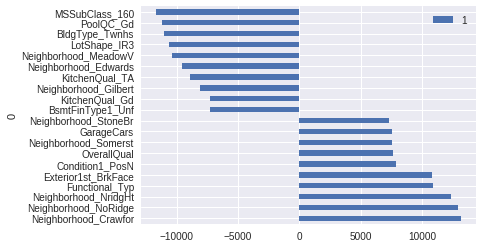

In [660]:
plot_coef(ridge_cv_raw)

#### Which features add / take away most value from a home?

# (Optional) Informing Business Value

Interpreting our work for a non-technical audience is a vital skill that every good Data Scientist must cultivate.  At the end of the day, our work must be informative to business process so connecting our detailed efforts to a high level strategy is critical.

We've established a few businesses cases that you should assert some explanation and advise best strategy through a model of your choice.  Also call out any exploratory analysis and reasoning for any recommendation.

##### For each question:
* Plot relevant data
* Fit a new model or use a previous  model
* Plot relevant coefficients


#### (Optional) Case 1: Which features add / take away most value from a home?

You just explained which coeffients add / take away most value, technically, but can you explain this in a non-technical manner?  Also, emphasize _why_ in your explanation.

- Choose a few examples and explain why the coefficients describe the target value of the property.

#### (Optional) Case 2: Can you identify any abnormally priced houses?
We might consider these being properties that are over or under predicted by price. Can you make sense of when and why these are over and under predicted?

#### (Optional) Case 3:  Which houses are good investments?

Which criteria would you look at?  How sure can you be of your assumptions?  Give precise metrics but also give a concise recommendation that is non-technical that communicates the risks of your anlaysis.

#### (Optional) Case 4:  Which houses are good investments (extended)?
One idea that is common in the real-estate invement community is called "flipping".  This usually entails buying a property with "changable" charactaristics that can be upgraded.  Examples of changable or "upgradable" features include:  A garage, a kitchen, etc.

Can you give us an idea of investments opportunities considering "upgradable" features?  You will have to explore this idea on your own and possibly do a little research for subject matter expertise.

- Some features of a house are worth more than others
- Some features can't be upgraded (ie: square footage)